# TME 8: Split
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2019/course/view.php?id=4248. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! 


In [1]:
from PIL import Image
from pylab import *

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



## Exercice 1

Question 1: 
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.


In [6]:
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
     #n vertical; m horizontal
    x,y,n,m=reg
    if(pred(I,reg,* args) and n>2 and m>2):
        n2=n//2
        m2=m//2
        NO=split(I,(x,y,n2,m2 ),pred,*args)
        NE=split(I, (x, y+m2, n2, m2), pred, *args)
        SO=split(I, (x+n2, y, n2, m2), pred, *args)
        SE=split(I, (x+n2, y+m2, n2, m2), pred, *args)
        return [NO,NE,SO,SE]
    else:
        return [reg]

Question 2:
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``B`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [7]:
def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """
    x,y,n,m=reg
    return I[x:x+n,y:y+m].std()>args[0]
 

Question 3: Écrire la fonction ``splitprof(L)`` qui réaliste un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [8]:
#la fonction retourne la liste des feuilles ( liste de blocs)
def splitprof(L):
    """ 4-aire -> list[Bloc]"""
    #la liste de retour
    if(len(L)==1):
        return L
    else:
        return splitprof(L[0])+splitprof(L[1])+splitprof(L[2])+splitprof(L[3])


Question 4: Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

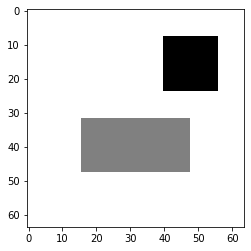

In [209]:
# Tests
I=img_test
#plt.axis('off')
imshow(I, cmap='gray')

In [62]:

(n,m)=np.shape(I)
seuil_var=0
"""
Une région est donnée par la valeur du coin haut gauche, sa taille verticale, sa taille horizontale
c'est un tuple (x,y,n,m)
"""
reg=(0,0,n,m)
#print(predsplit1(I,reg,seuil_var))
result=split(I,(0,0,n,m),predsplit1, seuil_var)
print ("valeurs retournées par split")
print (result)
print("résultat de splitprof")
LL=splitprof(result)
print(LL)
print("Le nombre de feuilles est "+str(shape(LL)[0]))

valeurs retournées par split
[[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]
résultat de splitprof
[(0, 0, 32, 32), (0, 32, 8, 8), (0, 40, 8, 8), (8, 32, 8, 8), (8, 40, 8, 8), (0, 48, 8, 8), (0, 56, 8, 8), (8, 48, 8, 8), (8, 56, 8, 8), (16, 32, 8, 8), (16, 40, 8, 8), (24, 32, 8, 8), (24, 40, 8, 8), (16, 48, 8, 8), (16, 56, 8, 8), (24, 48, 8, 8), (24, 56, 8, 8), (32, 0, 16, 16), (32, 16, 16, 16), (48, 0, 16, 16), (48, 16, 16, 16), (32, 32, 16, 16), (32, 48, 16, 16), (48, 32, 16, 16), (48, 48, 16, 16)]
Le nombre de feuilles est 25


## Commentaire
On observe notre fonction splitprof marche bien car elle retourne bien une liste des blocs retrournés par split
Le nombre de feuilles obtenu correspond bien à celui obtenu en TD

Question 4: Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de bloc et une image et retourne une image dont les bords de chaque éléments de ``L`` ont été dessiné en rouge. Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.


In [49]:
# elle prend en argument la liste retournée par splitprof
def splitdraw(LL,I):
    """ list[Bloc]*Array -> Array
        parcours de la liste dessin des régions 
    """
    n,m=I.shape
    RGB=zeros((n,m, 3))
    #Initialisation
    for i in range(3):
        RGB[:,:,i]=I
    for (x, y, h, l) in LL:
        #ligne horizontal supérieure
        RGB[x,y:y+l,0]=255
        RGB[x,y:y+l ,1]=0
        RGB[x,y:y+l ,2]=0
        #ligne horizontale inférieure
        RGB[(x+h-1),y:y+l ,0]=255
        RGB[x+h-1,y:y+l ,1]=0
        RGB[x+h-1,y:y+l,2]=0
        #ligne verticale gauche
        RGB[x:x+h,y ,0]=255
        RGB[x:x+h,y ,1]=0
        RGB[x:x+h,y ,2]=0
        #ligne verticale droite
        RGB[x:x+h,y+l-1 ,0]=255
        RGB[x:x+h,y+l-1 ,1]=0
        RGB[x:x+h,y+l-1 ,2]=0
        
    return RGB/255


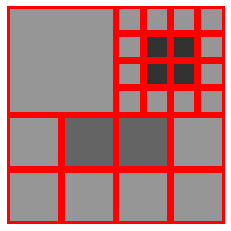

In [60]:
im=splitdraw(LL,I)
plt.axis('off')
imshow(im)

## Commentaire
Notre fonction marche bien, l'affichage correspond au résultat obtenu en déroulant l'algorithme manuellement en TD

Question 5: Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

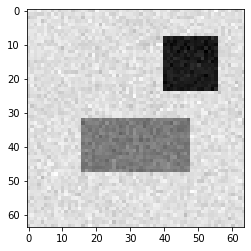

In [210]:
from numpy import random
#ajout du bruit gaussien 
sigma=5
image_bruite=I+sigma*random.randn(n,m) # n et m sont les valeurs de shape donnée pour l'image appelé dans une cellule précédente
#plt.axis('off')
imshow(image_bruite, cmap='gray')

In [179]:
# test de valeurs sur le seuil
def general_split(I,seuil_var):
    n,m=shape(I)
    res=split(I,(0,0,n,m),predsplit1, seuil_var)
    LL=splitprof(res)
    im=splitdraw(LL,I)
    plt.axis('off')
    plt.title('seuil='+str(seuil_var))
    print( "nb blocs="+str(shape(LL)[0]))
    imshow(im, cmap='gray')

nb blocs=1024


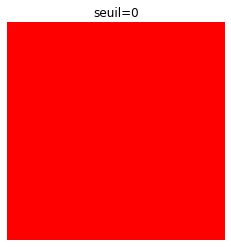

In [180]:
#Test1
seuil=0
general_split(image_bruite, seuil)

nb blocs=115


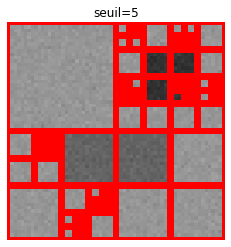

In [181]:
#Test2
seuil=5
general_split(image_bruite, seuil)

nb blocs=25


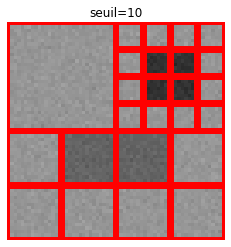

In [182]:
#Test3
seuil=10
general_split(image_bruite, seuil)

nb blocs=25


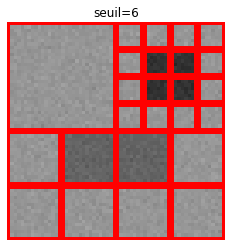

In [183]:
#Test4
seuil=6
general_split(image_bruite, seuil)

## Commentaire
il m'a fallut choisir 6 comme valeur de seuil, qui est une valeur supérieure à 0 choisi pour l'image sans bruit. Ceci est cohérent, car dans l'image sans bruit, on cherche à avoir des régions homogènes en découpant, et une région homogène correspond à une variance =0, tandis qu'avec l'ajout du bruit, les régions qu'on cherche à avoir à la fin du découpage ne sont plus homogène à cause du bruit. Si on garde le seuil à 0, les variations causées par le bruit seront considérés comme de nouvelles régions, on doit donc augmenter la valeur de variation pour laquelle on considère notre région homogène.
### pour résumer
L bruitage donne une variation dans les valeurs des pixels par rapport à l'image originale. Ainsi, l'ecart-type de chaque région va être augmenté.

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 4 images naturelles fournie. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

### image angio

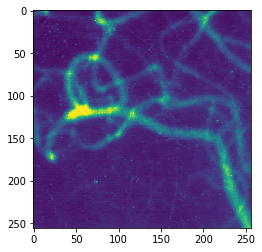

In [186]:
imshow(angio)

nb blocs=1213


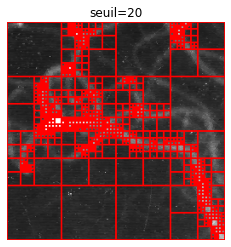

In [187]:
seuil=20
general_split(angio, seuil)

nb blocs=4135


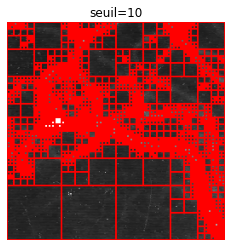

In [188]:
seuil=10
general_split(angio, seuil)

nb blocs=5956


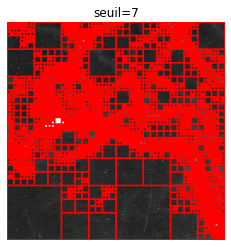

In [189]:
seuil=7
general_split(angio, seuil)

nb blocs=6955


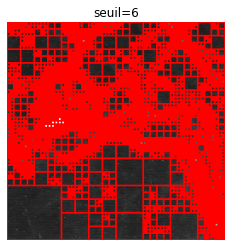

In [190]:
seuil=6
general_split(angio, seuil)


### cam

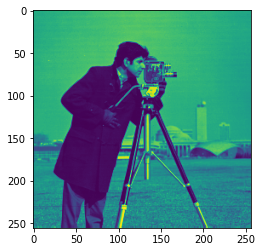

In [191]:
imshow(cam)

nb blocs=5767


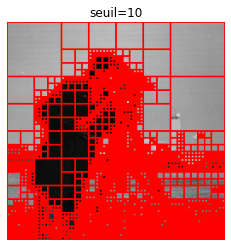

In [192]:
seuil=10
general_split(cam, seuil)

nb blocs=2923


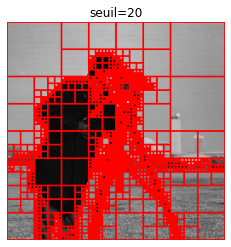

In [193]:
seuil=20
general_split(cam, seuil)

## commentaire: 
à priori on pourrait se dire que ce découpage est bien avec un seuil =20, cependant il y a une région (2éme bloc en partant du haut à droite) qui est considéré comme un seul, alors qu'il devrait être découpé, donc on devrait prendre un seuil plus bas

nb blocs=6115


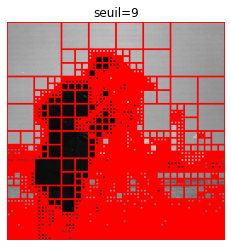

In [194]:
seuil=9
general_split(cam, seuil)

### muscle

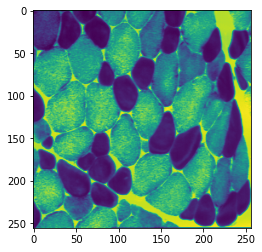

In [195]:
imshow(muscle)

nb blocs=10174


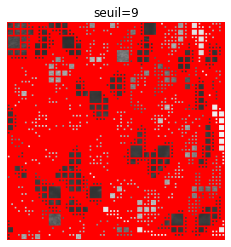

In [196]:
seuil=9
general_split(muscle, seuil)

nb blocs=4294


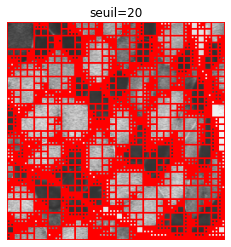

In [197]:
seuil=20
general_split(muscle, seuil)

nb blocs=5452


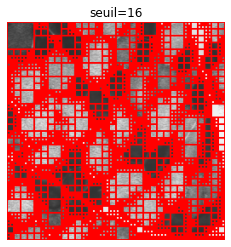

In [198]:
seuil=16
general_split(muscle, seuil)

#### Observation 
avec seuil=16, il reste encore deux region ou une frontiere de deux parties appartiennent à une même région

nb blocs=5839


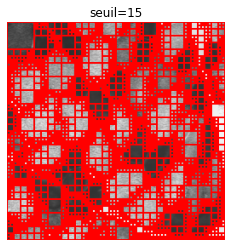

In [199]:
seuil=15
general_split(muscle, seuil)

### prisme

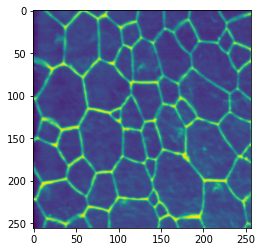

In [200]:
imshow(prisme)

nb blocs=6076


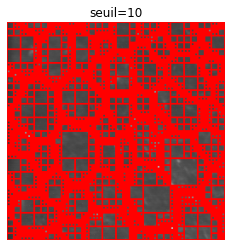

In [201]:
seuil=10
general_split(prisme, seuil)

nb blocs=2929


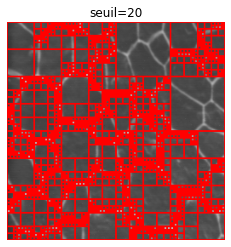

In [202]:
seuil=20
general_split(prisme, seuil)

nb blocs=4795


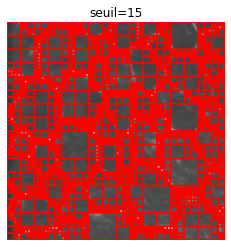

In [203]:
seuil=15
general_split(prisme, seuil)

### seiche

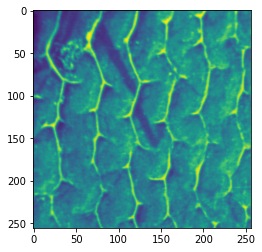

In [204]:
imshow(seiche)

nb blocs=4348


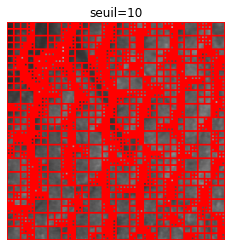

In [205]:
seuil=10
general_split(seiche, seuil)

nb blocs=2167


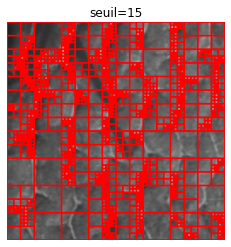

In [206]:
seuil=15
general_split(seiche, seuil)

nb blocs=3409


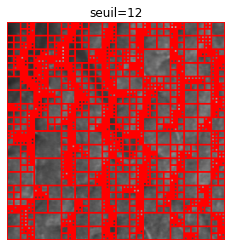

In [207]:
seuil=12
general_split(seiche, seuil)

## Commentaire
### seuil choisi pour angio= 6
### Seuil choisi pour cam=9
### Seuil choisi pour muscle=15
### Seuil choisi pour prisme=15
### Seuil choisi pour seiche=12

Question 2 (bonus): proposer un critère de découpage alternatif. Par exemple, un critère basé sur des contours ou un autre. Le critère peut être adapté à chaque type d'image.


## Critère de découpage alternatif:
### Première proposition
la proportion des pixels de la région dont le niveau de gris est à l'extérieur de [ /mu_R -/sigma_R, /mu_R +/sigma_R ] est supérieure à un seuil donné
/mu_R : moyenne de la région R
/sigma_R: écart type de la région
source: https://dept-info.labri.fr/~vialard/Image3D/cours/cours-segmentation.pdf p 47, critère inverse donné pour la fusion

### Deuxième proposition
déterminer   les   différents   modes   de   l’histogramme  des  niveaux  de  gris  et  à  affecter  une  ou  plusieurs  région à chaque mode
source: http://www.isir.upmc.fr/UserFiles/File/clady_homepage/EPU/2-Contour.pdf p 9